In [133]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
from sklearn.metrics import confusion_matrix

# Ouvrir un data set `a l’aide de pandas et rcup´erer un dataframe

In [7]:
data=pd.read_csv("diabetes.csv")

# Connaitre les dimensions du dataframe

In [8]:
data.shape

(768, 9)

# Explorer la liste des colonnes


In [10]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# Recuperer une colonne, un ensemble de colonnes

In [37]:
Pregnancies=data[["Pregnancies"]]
Pregnancies.head(3)

,Pregnancies
0,6
1,1
2,8


# Recupere un ensemble de colonnes

In [35]:
cols = data[["Pregnancies","Insulin","BMI","Age"]]

cols.head(3)

,Pregnancies,Insulin,BMI,Age
0,6,0,33.6,50
1,1,0,26.6,31
2,8,0,23.3,32


# Le max, le min, la moyenne d’une colonne

In [51]:
print("->la valeur moyenne de chaque colonne \n",data.describe().mean())
print("\n->la valeur minimale de chaque colonne \n",data.describe().min())

print("\n->la valeur maximale de chaque colonne \n",data.describe().max())


->la valeur moyenne de chaque colonne 
 Pregnancies                 100.276829
Glucose                     184.514644
BloodPressure               149.057659
SkinThickness               119.811084
Insulin                     245.849185
BMI                         121.359592
DiabetesPedigreeFunction     96.567963
Age                         126.125140
Outcome                      96.353239
dtype: float64

->la valeur minimale de chaque colonne 
 Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                      0.000000
BMI                          0.000000
DiabetesPedigreeFunction     0.078000
Age                         11.760232
Outcome                      0.000000
dtype: float64

->la valeur maximale de chaque colonne 
 Pregnancies                 768.0
Glucose                     768.0
BloodPressure               768.0
SkinThickness               768.0
Insulin          

<br>

# 1. Quelles sont les principales etapes a suivre pour etablir un modele de Single Variate Logistic Regression bas´e sur sklearn ?


1. importer le model de regression logisque depuis Sklearn 
2. instancier le modele-Objet 
3. préparer les dataSets d'entrainement et de test
4. faire l'entrainement avec la methode fit()
5. vous avez un model entrainé, qu'il doit etre testé sur la dataset de test pour le valider

<br>

# 2. Data

## (a) D´efinir le dataset (X,y) et les afficher

In [41]:
X = data[[ "Glucose"]]
X.head(3)

,Glucose
0,148
1,85
2,183


In [42]:
Y = data[[ "Outcome"]]
Y.head(3)

,Outcome
0,1
1,0
2,1


## (b) Tracer les donnees a l’aide de matplotlib

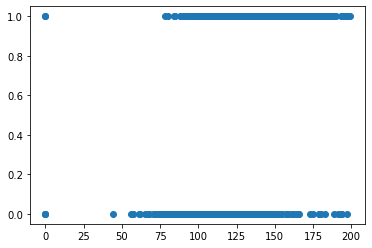

In [43]:
plt.scatter( X, Y ) 
plt.show()

## (c) Conclusions ?

> la variable `Glucos` n'est pas suffisante pour faire la classification

## (d) a l’aide de train test split de sklearn.model selection, diviser le dataset en training dataset et test dataset (80% pour training data et 20% pour test data )

In [44]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size=0.2, train_size=0.8, random_state=7 )

## (e) Pourquoi il faut separer les donnees en donnees d’apprentissage et en donnees de test ?

> déja pour entrainer le model avec une partie des données qu'on a, et après le valider avec une autre partie différente qu'il n'a jamais vu pour le valider

## (f) Afficher le nombre d’enregistrement pour le training et le nombre d’enregistrement pour le test

In [47]:
print("-> Le nombre d'enregistrements de trainning : "+str( len(Xtrain) ) )

-> Le nombre d'enregistrements de trainning : 614


In [48]:
print("-> Le nombre d'enregistrements de testing : "+str( len(Xtest) ) )

-> Le nombre d'enregistrements de testing : 154


# 3. Modele

## (a) Creer le modele

In [53]:
model = LogisticRegression()

## (b) Faire l’apprentissage

In [62]:
model.fit( Xtrain, Ytrain.to_numpy().reshape(-1))

LogisticRegression()

## (c) Afficher les coefficients

In [67]:
model.coef_

array([[0.03577029]])

In [68]:
model.intercept_

array([-5.08696757])

## (d) Tracer la fonction Logit (matplotlib)


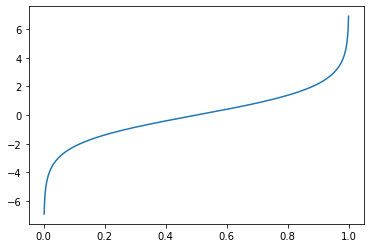

In [87]:
def logit(p):
    return math.log( p/(1-p) ) 
values = [ i for i in np.arange( 0.001, 0.99999999999999, 0.001) ]
plt.plot( values, [ logit(i) for i in values ] ) 
plt.show()


## (e) Tracer la fonction Sigmoid (matplotlib)


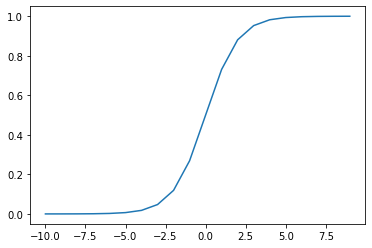

In [98]:
def sigmoid(p):
    return ( 1/(1+math.exp(-p) ) )  
values = [ i for i in np.arange( -10, 10, 1) ]
plt.plot( values, [ sigmoid(i) for i in values ] ) 
plt.show()

## (f) En utilisant les coefficients trouves par l’algorithme :

### i. Ecrire l’expression math´ematique pour faire la pr´ediction pour une personne ayant le glucose 197

> on a dèjà la pente et l'intercepteur du regresseur du model donc l'expression est :

```
prediction = 1/( 1 + exp( -0.03577029 * 197 + 5.08696757   ) )
```

<br>

## ii. Calculer la sortie de cette valeur (a l’aide de python) et comment l’interpreter


In [120]:
print(" => prediction du model :", str( model.predict( pd.DataFrame({ "Glucose": [ 197 ] }) ) ))
print("\n => avec l'expression mathematique :  \n")
print("prediction = 1/( 1 - exp( -0.03577029 * 197 + 5.08696757   ) ) = "+ str( 1/( 1 + math.exp( -0.03577029 * 197 + 5.08696757   ) )  ))

 => prediction du model : [1]

 => avec l'expression mathematique :  

prediction = 1/( 1 - exp( -0.03577029 * 197 + 5.08696757   ) ) = 0.8765090937905831


> le model a predi que cette personne ayant le glucose 197, dispose des diabetiezes puisque la valeur donnée est supérieur à 0.5

### iii. A quelle classe appartient cette personne ?

> cette personne appatient à la classe des personnes malades ; classe 1

## (g) En utilisant les coefficients trouves par l’algorithme :


### i. Ecrire l’expression mathematique pour faire la prediction pour un ensemble de personnes ayant le glucose respectivement [110,139,100,84,44]


> on a dèjà la pente et l'intercepteur du regresseur du model donc l'expression est :

```
prediction(p1) = 1/( 1 + exp( -0.03577029 * 110 + 5.08696757   ) )
prediction(p2) = 1/( 1 + exp( -0.03577029 * 139 + 5.08696757   ) )
prediction(p3) = 1/( 1 + exp( -0.03577029 * 100 + 5.08696757   ) )
prediction(p4) = 1/( 1 + exp( -0.03577029 * 84 + 5.08696757   ) )
prediction(p5) = 1/( 1 + exp( -0.03577029 * 44 + 5.08696757   ) )
```

<br>

## ii. Calculer la sortie de cette valeur (a l’aide de python) et comment l’interpreter


In [122]:
print(" => prediction du model :", str( model.predict( pd.DataFrame({ "Glucose": [ 110,139,100,84,44 ] }) ) ))
print("\nprediction(p1) = 1/( 1 - exp( -0.03577029 * 1110 + 5.08696757   ) ) = "+ str( 1/( 1 + math.exp( -0.03577029 * 110 + 5.08696757   ) )  ))
print("\nprediction(p2) = 1/( 1 - exp( -0.03577029 * 139 + 5.08696757   ) ) = "+ str( 1/( 1 + math.exp( -0.03577029 * 139 + 5.08696757   ) )  ))
print("\nprediction(p3) = 1/( 1 - exp( -0.03577029 * 100 + 5.08696757   ) ) = "+ str( 1/( 1 + math.exp( -0.03577029 * 100 + 5.08696757   ) )  ))
print("\nprediction(p4) = 1/( 1 - exp( -0.03577029 * 84 + 5.08696757   ) ) = "+ str( 1/( 1 + math.exp( -0.03577029 * 84 + 5.08696757   ) )  ))
print("\nprediction(p5) = 1/( 1 - exp( -0.03577029 * 44 + 5.08696757   ) ) = "+ str( 1/( 1 + math.exp( -0.03577029 * 44 + 5.08696757   ) )  ))

 => prediction du model : [0 0 0 0 0]

prediction(p1) = 1/( 1 - exp( -0.03577029 * 1110 + 5.08696757   ) ) = 0.24008096574674884

prediction(p2) = 1/( 1 - exp( -0.03577029 * 139 + 5.08696757   ) ) = 0.47130724338987123

prediction(p3) = 1/( 1 - exp( -0.03577029 * 100 + 5.08696757   ) ) = 0.18094789725327928

prediction(p4) = 1/( 1 - exp( -0.03577029 * 84 + 5.08696757   ) ) = 0.11083273347301534

prediction(p5) = 1/( 1 - exp( -0.03577029 * 44 + 5.08696757   ) ) = 0.02894249355674472


> le model a predi que toutes les personnes ne disposent pas des diabetiezes puisque les valeurs obtenues sont inférieures à 0.5

### iii. A quelle classe appartient chaque personne ? 


> toutes les personnes appartiennent à la classe 0, des non malades



# 4. Evaluation

## (a) Soit la matrice de confusion suivante :

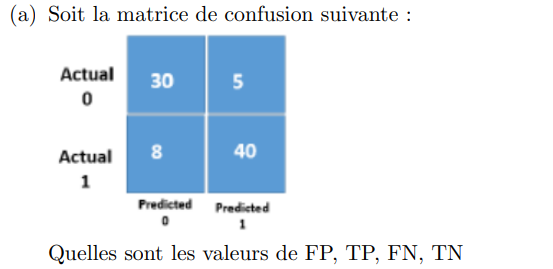

In [129]:
predictions = model.predict( Xtest )
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [132]:
Ytest.to_numpy().reshape(-1)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [139]:
tn, fp, fn, tp = confusion_matrix( Ytest, predictions).ravel()

In [140]:
print(" tn : {} | tp: {} | fp : {} | fn : {} ".format( tn, tp, fp, fn) )

 tn : 88 | tp: 29 | fp : 9 | fn : 28 


<br>

## Soit les deux vecteurs suivants :

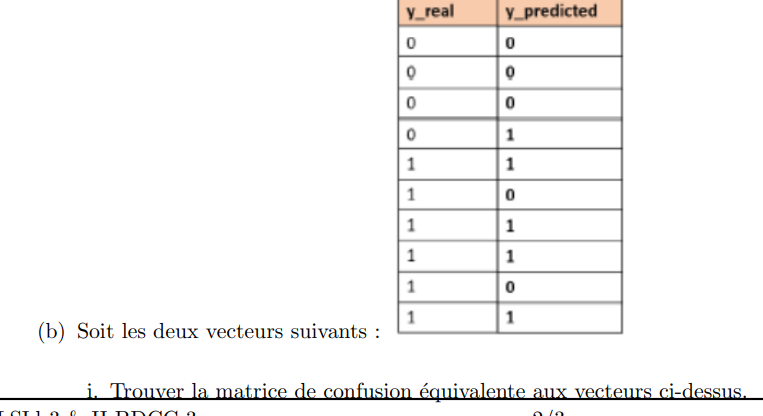

In [141]:
fn = 1 
tn = 3
fp = 2
tp = 4


<br>

## ii. Ecrire une fonction en python qui retourne une matrice de confusion. Tester cette fonction en utilisant les deux vecteurs de la question precedente.

In [ ]:
def 